# Housing Price Prediction - 2020

##  Introduction: Business problem

According to U.S Census Bureau, the median home price in 
   * 1980  - $148,000 
   
   * 2000  - $180,000 
   
   * 2010  - $375,000 
   
   * 2020  - $1,500,000

Bay Area Real Estate – most expensive market in California
The average value of a home in the city is more than one-million dollars more than the median home value in the United States.

### How the COVID has affected the Bay Area real estate market?

* Record Unemployment & Volatile Stock market
* Uncertain economic times during COVID has affected the buyer’s & seller’s mindset
	**- Buyer’s reluctant to invest during recession
	**- Seller’s removed the house listing and the number of newly listed properties declined
	**- Real Estate market frozen as soon as the pandemic started

But..
Due to the deadliest pandemic people now see their home not only as a place   to live, but as a shelter and workspace. 

Our aim is to understand, explore the performance of specific neighborhoods and answer few research questions. 

### Data
 The data was scraped from available results in zillow.com. The features scrapped are:
 * Address
 * List_price
 * Address.1
 * City
 * Zipcode 
 * Zestimate 
 * Bed
 * Bath
 * House_size
 * House_type
 * Year_Built	
 * Parking	
 * Lot	
 * HOA	
 * Price_Sqft	
 * walk_score	
 * walk_desc	
 * transit_score	
 * transit_desc

### Importing Libraries

### WEB SCRAPPING

In [1]:
# importing all the required libraries
import urllib.request
import urllib.parse
import urllib.error
from bs4 import BeautifulSoup as BS
import ssl
import json
import ast
import os
from urllib.request import Request, urlopen
import pandas as pd
import requests
import re
import time
import math

In [2]:
# securing the connection 
ctx                = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode    = ssl.CERT_NONE

In [38]:
# initiatzing urls,zillow links
urls = []
zillow_links = []

zipcodes=[95119]

# created nested for loop to collect all the links related to mentioned zipcode above
for zip in zipcodes:
    url_count="https://www.zillow.com/homes/"+str(zip)+"_rb/"
    request_url_count = Request(url_count, headers={'User-Agent': 'Mozilla/5.0'})
    zillow_count = urlopen(request_url_count).read()
    soup = BS(zillow_count,'html.parser')
    result_count=soup.findAll('span',attrs={'class':'result-count'})
    resct=str(result_count)[28:30]
    res=math.floor(int(resct)/25)
    res=res+1
    for i in range(1,res):
        print(zip)
        print (i)
        url_1= "https://www.zillow.com/homes/"+str(zip)+"_rb/"+str(i)+"_p/"
        print (url_1)
        request_url     = Request(url_1, headers={'User-Agent': 'Mozilla/5.0'})
        zillow = urlopen(request_url).read()
        soup = BS(zillow,'html.parser')
        links = soup.findAll('a',attrs={'class':'list-card-link list-card-link-top-margin'},href=True)
        for houselink in links:
            #print(houselink['href'])
            houselink_cur=houselink['href']
            if "homedetails" in str(houselink_cur):
                print(houselink_cur)
                zillow_links.append(houselink['href'])
zillow_links

95119
1
https://www.zillow.com/homes/95119_rb/1_p/
https://www.zillow.com/homedetails/349-Manila-Dr-San-Jose-CA-95119/19838095_zpid/
https://www.zillow.com/homedetails/6980-Sessions-Dr-San-Jose-CA-95119/19841398_zpid/
https://www.zillow.com/homedetails/281-Esteban-Way-San-Jose-CA-95119/19838595_zpid/
https://www.zillow.com/homedetails/371-Curie-Dr-San-Jose-CA-95119/19838017_zpid/
https://www.zillow.com/homedetails/6469-Purple-Hills-Dr-San-Jose-CA-95119/19838484_zpid/
https://www.zillow.com/homedetails/6213-Barb-Werner-Ln-San-Jose-CA-95119/19841850_zpid/
https://www.zillow.com/homedetails/211-Castillon-Way-San-Jose-CA-95119/19838966_zpid/
https://www.zillow.com/homedetails/158-Sunwood-Meadows-Pl-San-Jose-CA-95119/19841608_zpid/
https://www.zillow.com/homedetails/6755-Muscat-Dr-San-Jose-CA-95119/19839627_zpid/
https://www.zillow.com/homedetails/0-Vineyard-Dr-San-Jose-CA-95119/2079107806_zpid/
https://www.zillow.com/homedetails/6237-Ginashell-Cir-San-Jose-CA-95119/19841678_zpid/
https://w

['https://www.zillow.com/homedetails/349-Manila-Dr-San-Jose-CA-95119/19838095_zpid/',
 'https://www.zillow.com/homedetails/6980-Sessions-Dr-San-Jose-CA-95119/19841398_zpid/',
 'https://www.zillow.com/homedetails/281-Esteban-Way-San-Jose-CA-95119/19838595_zpid/',
 'https://www.zillow.com/homedetails/371-Curie-Dr-San-Jose-CA-95119/19838017_zpid/',
 'https://www.zillow.com/homedetails/6469-Purple-Hills-Dr-San-Jose-CA-95119/19838484_zpid/',
 'https://www.zillow.com/homedetails/6213-Barb-Werner-Ln-San-Jose-CA-95119/19841850_zpid/',
 'https://www.zillow.com/homedetails/211-Castillon-Way-San-Jose-CA-95119/19838966_zpid/',
 'https://www.zillow.com/homedetails/158-Sunwood-Meadows-Pl-San-Jose-CA-95119/19841608_zpid/',
 'https://www.zillow.com/homedetails/6755-Muscat-Dr-San-Jose-CA-95119/19839627_zpid/',
 'https://www.zillow.com/homedetails/0-Vineyard-Dr-San-Jose-CA-95119/2079107806_zpid/',
 'https://www.zillow.com/homedetails/6237-Ginashell-Cir-San-Jose-CA-95119/19841678_zpid/',
 'https://www.zi

In [39]:
# defined a function for extracting information
def housedetails(url):
    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode    = ssl.CERT_NONE
    request     = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    zillow = urlopen(request).read()
    soup = BS(zillow,'html.parser')

    #         a_zestimate =soup.findAll('div',attrs={'display':'flex'}) 
    #flags are for corner cases
    flag=1
    rent_sale=soup.findAll('div',attrs = {'class':"ds-home-details-chip"})
    for i in rent_sale:
        if "rent" in i.text:
            flag=0
        elif "construction" in i.text:
            flag=0
    if(flag):
        zestimate =soup.findAll('div',attrs={'display':'flex'})
        zestimate = zestimate[4].text.replace(",","")

        house2=soup.findAll('li',attrs={'class':'ds-home-fact-list-item'})
        house_facts=[None]*6
        for i in house2:
            #print(i.text)
            #print(i.find_all(text="Type"))
            if "Type" in i.text:
                house_facts[0]=i.text.replace("Type:","")
                #print(house_facts[0])
            elif "Year" in i.text:
                house_facts[1]=i.text.replace("Year built:","")
            elif "Parking" in i.text:
                house_facts[2]=i.text.replace("Parking:","")
            elif "Lot" in i.text:
                lotsize=i.text.replace("Lot:","").replace(",","")
                house_facts[3]=lotsize
            elif "HOA" in i.text:
                house_facts[4]=i.text.replace("HOA:","")
            elif "Price" in i.text:
                house_facts[5]=i.text.replace("Price/sqft:","").replace(",","")

        # finding listprice paramter
        listprice = soup.findAll('span',attrs={'class':'ds-value'})
        listprice = listprice[0].text.replace(",","")
        
        #finding address
        address = soup.findAll('h1',attrs={'class':'ds-address-container'})
        address = address[0].text.replace(",",";").replace("\xa0","")
        
        # finding bed and bath
        bed_bath = soup.findAll('span',attrs = {'class':'ds-bed-bath-living-area'})
        bedinfo=[None]*3
        for i in bed_bath:
            if "bd" in i.text:
                bedinfo[0]=i.text.replace("bd","")
            elif "ba" in i.text:
                bedinfo[1]=i.text.replace("ba","")
            elif "Square Feet" in i.text:
                sqftt=i.text.replace("Square Feet","")
                bedinfo[2]=str(sqftt).replace(",","")
        house1_details=[]
        house1_details=[url,listprice,address,zestimate]
        house1_details.extend(bedinfo)
        house1_details.extend(house_facts)
        return house1_details

In [40]:
# creating excel file  and writing the extracted information into it
import time
zillow_milpitas=[]
timestr = time.strftime("%Y%m%d-%H%M%S")
city="city"+str(zipcodes[0])
filename=city+str(timestr)+str(".csv")
f1=open(filename,'w')
f1.write("zpidurl;List_price;Address;City;Zipcode;Zestimate;Bed;Bath;House_size;House_type;Year_Built;Parking;Lot;HOA;Price/Sqft\n")
for link in zillow_links:
    print(link)
    zillow_milpitas.append(housedetails(link))
    #print(housedetails(link))
    time.sleep(10)
    data_to_file=str(housedetails(link)).replace("'","").replace("]","").replace("[","").replace(",",";")
    f1.write(data_to_file+"\n")
f1.close()
    
    

https://www.zillow.com/homedetails/349-Manila-Dr-San-Jose-CA-95119/19838095_zpid/
https://www.zillow.com/homedetails/6980-Sessions-Dr-San-Jose-CA-95119/19841398_zpid/
https://www.zillow.com/homedetails/281-Esteban-Way-San-Jose-CA-95119/19838595_zpid/
https://www.zillow.com/homedetails/371-Curie-Dr-San-Jose-CA-95119/19838017_zpid/
https://www.zillow.com/homedetails/6469-Purple-Hills-Dr-San-Jose-CA-95119/19838484_zpid/
https://www.zillow.com/homedetails/6213-Barb-Werner-Ln-San-Jose-CA-95119/19841850_zpid/
https://www.zillow.com/homedetails/211-Castillon-Way-San-Jose-CA-95119/19838966_zpid/
https://www.zillow.com/homedetails/158-Sunwood-Meadows-Pl-San-Jose-CA-95119/19841608_zpid/
https://www.zillow.com/homedetails/6755-Muscat-Dr-San-Jose-CA-95119/19839627_zpid/
https://www.zillow.com/homedetails/0-Vineyard-Dr-San-Jose-CA-95119/2079107806_zpid/
https://www.zillow.com/homedetails/6237-Ginashell-Cir-San-Jose-CA-95119/19841678_zpid/
https://www.zillow.com/homedetails/393-Jai-Dr-San-Jose-CA-95

In [8]:
import pandas as pd

df = pd.read_excel('pandas_to_excel.xlsx')

df['zpid_url'] = df.Address.str.split('/').str[5]
df['zpid'] = df.zpid_url.str.split('_').str[0]
df = df.drop(['zpid_url'],axis=1)

In [10]:
list_of_zpids = df['zpid'].to_list()
print(list_of_zpids)
#print(list_of_zpids)
with open('zpids.txt', "w") as myfile:
        for i in list_of_zpids:
                myfile.write("%s\n" % i)

['19481361', '19483503', '19471816', '19483974', '79841734', '124742590', '19477858', '124030438', '19478250', '82960475', '250816029', '19479726', '251006717', '82952140', '19475230', '19476584', '19482023', '124745609', '19482898', '19476932', '19479045', '79846376', '19477447', '116157347', '300480687', '19472765', '64811281', '19471732', '19474269', '300482258', '19482611', '19471616', '2077983573', '251006533', '2078053629', '2078053911', '19481014', '295619764', '19481454', '19477498', '19480564', '19477075', '153117984', '304782353', '304782352', '304782354', '2078331304', '19481116', '2078352613', '82962599', '2078530780', '19476281', '153118047', '243211060', '19481075', '19473356', '300482048', '250642011', '64703491', '243209635', '153128201', '19479151', '2084842783', '153127198', '79845487', '19480754', '19473140', '19474754', '19481188', '300472231', '2096244908', '2086193868', '19536570', '19531204', '19510951', '19514729', '19510720', '19509919', '19536739', '19533421',

In [11]:
import http.client
import mimetypes
import json

conn = http.client.HTTPSConnection("www.zillow.com")

def get_walk_and_transit(property_id):
	payload = "{\"query\":\"query WalkAndTransitScoreQuery($zpid: ID!) {\\n  property(zpid: $zpid) {\\n    id\\n    walkScore {\\n      walkscore\\n      description\\n      ws_link\\n    }\\n    transitScore {\\n      transit_score\\n      description\\n      ws_link\\n    }\\n  }\\n}\\n\",\"operationName\":\"WalkAndTransitScoreQuery\",\"variables\":{\"zpid\":" + str(property_id) + "},\"clientVersion\":\"home-details/6.0.11.0.0.hotfix-10-01-2020.48935c6\"}"
	headers = {
	  'content-type': 'text/plain'
	}
	conn.request("POST", "/graphql/?zpid=" + str(property_id) + "&operationName=WalkAndTransitScoreQuery", payload, headers)
	res = conn.getresponse()
	data = res.read()
	res_json = json.loads(data.decode("utf-8"))
	walk_score_obj = res_json['data']['property']['walkScore']
	transit_score_obj = res_json['data']['property']['transitScore']
	return walk_score_obj, transit_score_obj

def get_price_history(property_id):
	payload = "{\"query\":\"query HomeValueChartDataQuery($zpid: ID!, $metricType: HomeValueChartMetricType, $timePeriod: HomeValueChartTimePeriod) {\\n  property(zpid: $zpid) {\\n    homeValueChartData(metricType: $metricType, timePeriod: $timePeriod) {\\n      points {\\n        x\\n        y\\n      }\\n      name\\n    }\\n  }\\n}\\n\",\"operationName\":\"HomeValueChartDataQuery\",\"variables\":{\"zpid\": " + str(property_id) + ",\"timePeriod\":\"TEN_YEARS\",\"metricType\":\"LOCAL_HOME_VALUES\",\"forecast\":true},\"clientVersion\":\"home-details/6.0.11.0.0.hotfix-10-01-2020.48935c6\"}"
	headers = {
	  'content-type': 'text/plain'
	}
	conn.request("POST", "/graphql/?zpid=" + str(property_id) +"&timePeriod=TEN_YEARS&metricType=LOCAL_HOME_VALUES&forecast=true&operationName=HomeValueChartDataQuery", payload, headers)
	res = conn.getresponse()
	data = res.read()
	res_json = json.loads(data.decode("utf-8"))
	return res_json['data']['property']['homeValueChartData']

property_id_list = [19481361,19483503,19471816,19483974]

for zpid in property_id_list:
	walk, trans = get_walk_and_transit(zpid)
	price_history = get_price_history(zpid)

	print("zpid: {} walk score: {} description: {} transit score: {} description: {} zestimate chart history size: {}".format(zpid, walk['walkscore'], walk['description'], trans['transit_score'], trans['description'], len(price_history)))

zpid: 19481361 walk score: 26 description: Car-Dependent transit score: 21 description: Minimal Transit zestimate chart history size: 4
zpid: 19483503 walk score: 12 description: Car-Dependent transit score: 19 description: Minimal Transit zestimate chart history size: 3
zpid: 19471816 walk score: 84 description: Very Walkable transit score: 35 description: Some Transit zestimate chart history size: 3
zpid: 19483974 walk score: 58 description: Somewhat Walkable transit score: 32 description: Some Transit zestimate chart history size: 3


### Importing Libraries


In [18]:
import pandas as pd
import numpy as np

### Import data


In [19]:
zillow_dataframe = pd.read_excel('zillow_final.xlsx')
zillow_dataframe.head()

,Address,List_price,Address.1,City,Zipcode,Zestimate,Bed,Bath,House_size,House_type,Year_Built,Parking,Lot,HOA,Price_Sqft,walk_score,walk_desc,transit_score,transit_desc
0,https://www.zillow.com/homedetails/465-La-Bare...,1299999,465 La Baree Dr,Milpitas,CA 95035,1345104,5,3,1902,Single Family,1962,1 space,6198 sqft,None,683,26,Car-Dependent,21.0,Minimal Transit
1,https://www.zillow.com/homedetails/2150-Lacey-...,1248888,2150 Lacey Dr,Milpitas,CA 95035,1328097,4,3,1856,Single Family,1971,2 spaces,6682 sqft,None,673,12,Car-Dependent,19.0,Minimal Transit
2,https://www.zillow.com/homedetails/19-Heath-St...,1300000,19 Heath St,Milpitas,CA 95035,1367241,3,3,1244,Single Family,1961,2 spaces,6490 sqft,None,1045,84,Very Walkable,35.0,Some Transit
3,https://www.zillow.com/homedetails/2192-Calle-...,1198000,2192 Calle Mesa Alta,Milpitas,CA 95035,1227534,3,3,1528,Single Family,1992,2 spaces,2008 sqft,None,784,58,Somewhat Walkable,32.0,Some Transit
4,https://www.zillow.com/homedetails/416-Dempsey...,458000,416 Dempsey Rd UNIT 217,Milpitas,CA 95035,463216,2,1,842,Condo,2007,No Data,None,$420/month,544,65,Somewhat Walkable,26.0,Some Transit


In [20]:
zillow_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Address          500 non-null object
List_price       500 non-null int64
Address.1        500 non-null object
City             500 non-null object
Zipcode          500 non-null object
Zestimate        500 non-null object
Bed              500 non-null object
Bath             500 non-null object
House_size       500 non-null object
House_type       500 non-null object
Year_Built       500 non-null object
Parking          500 non-null object
Lot              500 non-null object
HOA              500 non-null object
Price_Sqft       500 non-null object
walk_score       500 non-null object
walk_desc        498 non-null object
transit_score    499 non-null float64
transit_desc     498 non-null object
dtypes: float64(1), int64(1), object(17)
memory usage: 74.3+ KB


In [21]:
print('Number of listings: ', zillow_dataframe.shape[0])
print('Number of features in dataset: ', zillow_dataframe.shape[1])

Number of listings:  500
Number of features in dataset:  19


### Data cleaning & wrangling : housing dataframe 


In [22]:
# Removing "CA" characters from zipcode.
spec_chars = ["CA"]
for char in spec_chars:
    zillow_dataframe['Zipcode'] = zillow_dataframe['Zipcode'].str.replace(char, '')

In [23]:
#Removing sqft from lot column.
spec_chars = ["sqft","acres", "Acres", "acre"]
for char in spec_chars:
    zillow_dataframe['Lot'] = zillow_dataframe['Lot'].str.replace(char, '')

In [24]:
# Removing $ /month or /mo from HOA and leeping only price.
spec_chars = ["$","/","month","mo","/month","/mo"]
for char in spec_chars:
    zillow_dataframe['HOA'] = zillow_dataframe['HOA'].str.replace(char, '')

In [25]:
# Removing None value, special character with O value.
zillow_dataframe = zillow_dataframe.replace("None",0)
zillow_dataframe = zillow_dataframe.fillna(0)
zillow_dataframe=zillow_dataframe.replace("--",0)
zillow_dataframe['Parking'] = zillow_dataframe['Parking'].replace("No Data","0")


In [26]:
np.count_nonzero(zillow_dataframe["Zestimate"])

463

#### Missing zestimate values account for about 7.4%. Fill the missing Zestimate values with List price of the listing.


In [27]:
zillow_dataframe["Zestimate"] = zillow_dataframe["Zestimate"].mask(zillow_dataframe["Zestimate"] ==0).fillna(zillow_dataframe["List_price"])

In [28]:
np.count_nonzero(zillow_dataframe["Zestimate"])

500

#### Imputing missing Year_Built values with 0000 value.


In [33]:
zillow_dataframe["Year_Built"] = zillow_dataframe["Year_Built"].replace(0,"0000")
zillow_dataframe["Year_Built"] = zillow_dataframe["Year_Built"].replace("No Data","0000")


,Address,List_price,Address.1,City,Zipcode,Zestimate,Bed,Bath,House_size,House_type,Year_Built,Parking,Lot,HOA,Price_Sqft,walk_score,walk_desc,transit_score,transit_desc
69,https://www.zillow.com/homedetails/3463-Calave...,10000000,3463 Calaveras Rd,Milpitas,95035,10000000.0,3,2.0,1700,Single Family,1960,0,32.64,0.0,5882.0,0,Car-Dependent,0.0,No Nearby Transit
70,https://www.zillow.com/homedetails/517-Vista-R...,1250000,517 Vista Ridge Dr,Milpitas,95035,1250000.0,0,0.0,0,Vacant Land,0000,0,0.00,0.0,0.0,0,Car-Dependent,0.0,No Nearby Transit
71,https://www.zillow.com/homedetails/500-Vista-S...,899000,500 Vista Spring Ct,Milpitas,95035,899000.0,0,0.0,0,0,0000,0,0.00,0.0,0.0,0,Car-Dependent,0.0,No Nearby Transit
72,https://www.zillow.com/homedetails/1637-Grant-...,1660000,1637 Grant Rd,Mountain View,94040,1702952.0,4,3.0,1884,Townhouse,1979,2 spaces,1738.00,0.0,881.0,83,Very Walkable,37.0,Some Transit
73,https://www.zillow.com/homedetails/1520-Todd-S...,2499000,1520 Todd St,Mountain View,94040,2316777.0,3,2.0,1353,Single Family,1954,2 spaces,5122.00,0.0,1847.0,67,Somewhat Walkable,41.0,Some Transit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://www.zillow.com/homedetails/5471-Countr...,12500000,5471 Country Club Pkwy,San Jose,95138,3277660.0,5,5.0,6081,Single Family,1995,4 spaces,0.41,138.0,2056.0,1,Car-Dependent,0.0,No Nearby Transit
496,https://www.zillow.com/homedetails/2711-Nicasi...,965000,2711 Nicasio Ct,San Jose,95127,989969.0,4,3.0,2000,Single Family,2000,2 spaces,0.00,0.0,483.0,44,Car-Dependent,52.0,Good Transit
497,https://www.zillow.com/community/asana/2084711...,1870886,Residence 5 Asana,San Jose,95122,1870886.0,4,4.0,2020,Single Family,3624,2 spaces,0.00,0.0,440.0,78,Very Walkable,51.0,Good Transit
498,https://www.zillow.com/homedetails/5925-Charlo...,732880,5925 Charlotte Dr #314-BLD03,San Jose,95123,732880.0,2,2.0,2020,Townhouse,1316,2 spaces,0.00,0.0,557.0,45,Car-Dependent,48.0,Some Transit


In [30]:
# Converting data type of Lot,HOA,Price/Sqft from object to integer/float for analysis.
zillow_dataframe['Lot'] = pd.to_numeric(zillow_dataframe['Lot'])

zillow_dataframe['HOA'] = zillow_dataframe['HOA'].astype(str).astype(float)
zillow_dataframe['Price_Sqft'] = zillow_dataframe['Price_Sqft'].astype(str).astype(float)

In [31]:
zillow_dataframe.describe()

,List_price,Zestimate,Bed,Bath,House_size,Lot,HOA,Price_Sqft,transit_score
count,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,1.974580e+06,1.959934e+06,3.016000,2.403000,1917.228000,2326.93518,190.528000,819.894000,39.852000
std,2.196122e+06,2.080501e+06,1.636184,1.438046,1419.740898,2954.57119,416.249209,670.398149,17.544621
min,1.600000e+05,1.600000e+05,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,9.037375e+05,9.255622e+05,2.000000,2.000000,1103.000000,0.00000,0.000000,474.000000,33.000000
50%,1.318666e+06,1.369262e+06,3.000000,2.000000,1538.000000,1.04000,0.000000,766.000000,41.000000
75%,1.998916e+06,2.087508e+06,4.000000,3.000000,2220.500000,4633.25000,325.000000,1116.000000,52.000000
max,1.850000e+07,1.831571e+07,11.000000,10.000000,14391.000000,10872.00000,5008.000000,7565.000000,74.000000


In [32]:
zillow_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Address          500 non-null object
List_price       500 non-null int64
Address.1        500 non-null object
City             500 non-null object
Zipcode          500 non-null object
Zestimate        500 non-null float64
Bed              500 non-null int64
Bath             500 non-null float64
House_size       500 non-null int64
House_type       500 non-null object
Year_Built       500 non-null object
Parking          500 non-null object
Lot              500 non-null float64
HOA              500 non-null float64
Price_Sqft       500 non-null float64
walk_score       500 non-null object
walk_desc        500 non-null object
transit_score    500 non-null float64
transit_desc     500 non-null object
dtypes: float64(6), int64(3), object(10)
memory usage: 74.3+ KB


### Heat map to visualize any missing values

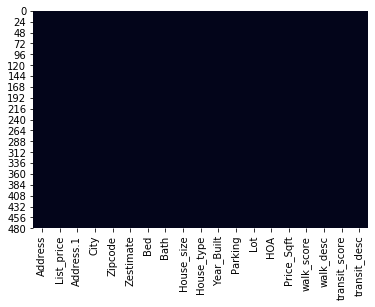

In [17]:
import seaborn as sns
sns.heatmap(zillow_dataframe.isnull(), cbar=False)


In [34]:
zillow_dataframe.to_excel('pandas_to_excel.xlsx', sheet_name='Zillow')
